# SECTION 08: MULTIPLE REGRESSION Part 2


## LEARNING OBJECTIVES:
- Review the Assumptions of Single Linear Regression.
- Learn about the additional assumption of no multicollinearity of features.
<br>
- Learn how to check data for the assumptions of linear regression.
- Learn about how to improve a baseline model based on results
- Learn how to run a multiple regression using statsmodels
- Learn how to diagnose results
### TOPICS:

### Part 1 [Last Time]:
- Multiple Linear Regression
    - How equation for single variable $ y=mx+b$ becomes:<br> $ \hat Y = \beta_0+\beta_1X_1 + \beta_2X_2+...+\beta_nX_n $
- Dealing with Categorical Variables
    - Label Encoding 
    - One-Hot / Dummy Encoding

### Part 2
- Multicollinearity of Features
- Feature Scaling & Normalization
- Multiple Linear Regression in Statsmodels
- Model Fit and Validation
- Model Diagnostics



# Regression Assumptions


In [ ]:
!pip install -U fsds
from fsds.imports import *

In [3]:
boston = fs.datasets.load_boston(verbose=True)
# boston.columns = [col.lower() for col in boston.columns]
display(boston.head())

[i] Loading boston housing dataset from sklearn.datasets
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
display(boston.head())
# print(boston.head())
display(boston.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  price    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


None

### 1. Linearity



> The linearity assumptions requires that there is a **linear relationship** between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant. 


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/lin_2.png" width=6000>


In [5]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,16)

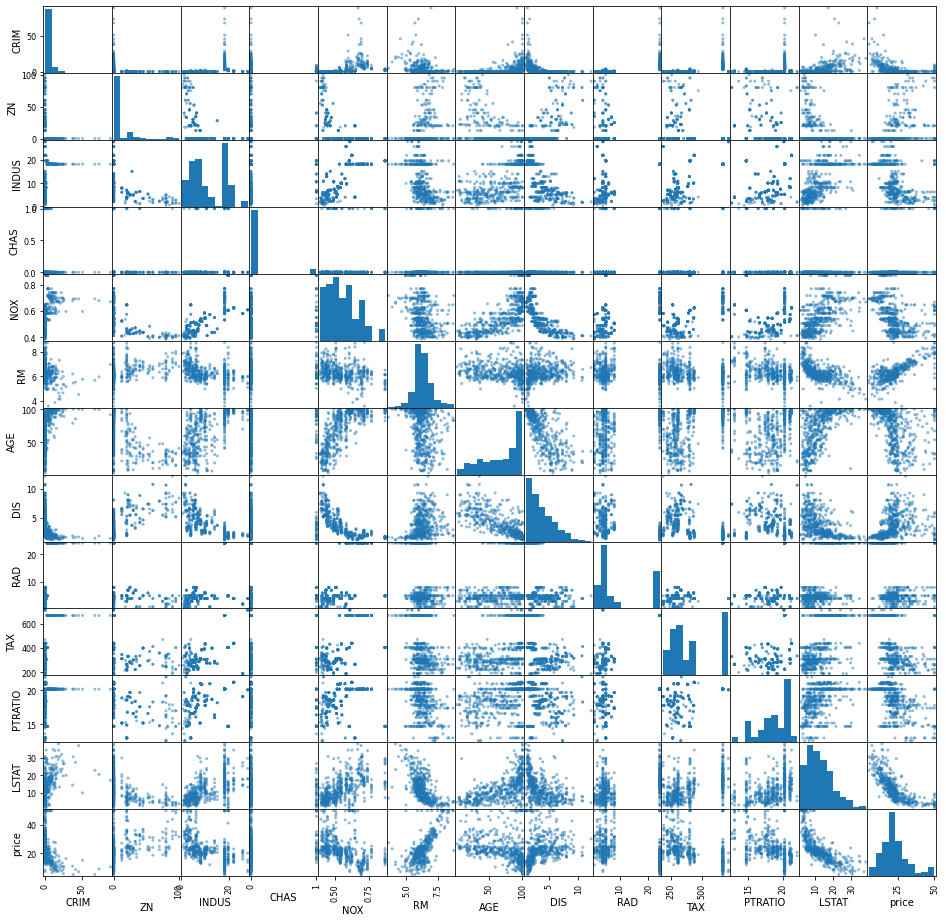

In [6]:
# How do we check for Linear Relationship?
pd.plotting.scatter_matrix(boston);

### 2. Normality 


> The normality assumption states that the **model residuals** should follow a normal distribution

- Note that the normality assumption talks about the **model residuals** and _not_ about the distributions of the **variables**! 
- In general, data scientists will often check the distributions of the variables as well. 
- **The easiest way to check for the normality assumption is with histograms or a Q-Q-Plots.**

<!-- 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/inhouse_histo.png" width="800"> -->


In [ ]:
## How do we check for Normality?
boston.hist()

#### Q-Q Plots



>In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.

- The Q-Q plot (quantile-quantile plot) is used to help assess if a sample comes from a known distribution such as a normal distribution. 
- For regression, when checking if the data in this sample is normally distributed, we can use a Normal Q-Q plot to test that assumption. Remember that this is just a visual check, so the interpretation remains subjective. 


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/inhouse_qq_plots.png" width="600">




### 3. Homoscedasticity 



> _Heteroscedasticity_ (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases. 

The inverse of heteroscedasticity is _homoscedasticity_, which indicates that a dependent variable's variability is equal across values of the independent variable. **Homoscedasticity is the third assumption necessary when creating a linear regression model.**

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/homo_2.png" width="700">

**A scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line).**


In [ ]:
## How do we check heteroscedasticity?


### 4. No Multicollinearity

- Assumes that the different predictor variables are not related.
- We use correlation and heatmaps to look for multicollinearity.
    - Guidelines: absolute $r$ about 0.75/0.80 is too highly correlated.


In [ ]:
# Checking with pandas alone
corr = boston.corr().round(3)
corr

In [ ]:
np.abs(corr)>0.75

In [ ]:
# Checking Visually 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(np.abs(corr),annot=True,cmap="Reds",ax=ax)

In [ ]:
# Checking Visually 

def multiplot(corr,figsize=(12,12)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True,mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax


### Judging Multicollinearity

In [ ]:
try:
    drop_cols = ['dis','tax']
    boston.drop(drop_cols,axis=1,inplace=True)
except:
    print('Dropcols were not in the dataframe.')

In [ ]:
multiplot(np.abs(boston.corr()))

In [ ]:
boston.drop('nox',axis=1,inplace=True)

In [ ]:
corr = np.abs(boston.corr())
multiplot(corr)

# Feature scaling and normalization

In [ ]:
boston.hist()

In [ ]:
log_cols =['age','lstat']

for col in log_cols:
    boston[col+'_log'] = np.log(boston[col])

In [ ]:
boston.hist();

In [ ]:
boston.drop('age_log',axis=1,inplace=True)

### Normalization
Definition: making data distribution more normally distributed
- log transformation
- remove outliers
    - IQR
    - Z-scores.
#### Log transformation

As seen in the previous lesson, a log transformation is a very useful tool when you have data that clearly does not follow a normal distribution. Log transformation can help reduce skewness when you have skewed data, and can help reducing variability of data. 

### Standardization

In [ ]:
boston.describe().round(3)

### Min-max scaling

When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This way of scaling brings all values between 0 and 1. 

### Standardization

When 

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!

### Mean normalization
When performing mean normalization, you use the following formula:
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

The distribution will have values 
between -1 and 1, and a mean of 0.


In [ ]:
## What columns to treat as categories:
cat_cols= ['chas']
num_cols = boston.drop(['chas','price'],axis=1).columns
num_cols

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(boston[num_cols])

In [ ]:
boston.shape

In [ ]:
type(scaled_data), scaled_data.shape

In [ ]:
boston_scaled = pd.DataFrame(data=scaled_data,columns=num_cols)
boston_scaled.describe().round(3)

In [ ]:
boston_scaled['price'] = boston['price']
boston_scaled['chas'] = boston['chas']
boston_scaled.describe().round(3)

In [ ]:
df = boston.copy()

In [ ]:
df = df.loc[df['crim']<3]

df.loc[df['crim']>3]

# Run multiple regression in statsmodels


In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [ ]:
cols = df.drop(['price','lstat','indus','rad'],axis=1).columns
str_cols = ' + '.join(cols)
str_cols

In [ ]:
formula = 'price~'+str_cols
formula

In [ ]:
model = smf.ols(formula=formula, data=df).fit()
model.summary()

In [ ]:
resids = model.resid
import scipy.stats as stats

sm.graphics.qqplot(resids,stats.norm,line='45',fit=True)

In [ ]:
mpl.rcParams['figure.figsize'] = (10,10)
plt.scatter( df['price'],resids,)

### Revisiting Our Assumptions
- Homoskedasticity
- Residuals are Normal 

In [ ]:
## Q-Q Plot
import scipy.stats as stats

resid = model.resid 
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True) 
fig.show() 

In [ ]:
#
plt.plot(resid)

# Model Validation

## Train Test Split

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-regression-model-validation-online-ds-ft-100719/master/images/new_overfit_underfit.png" width=500>

## K-Fold Validation
